In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

In [42]:
df=pd.read_csv('fatal-police-shootings-data.csv')

In [43]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [44]:
df.shape

(5416, 14)

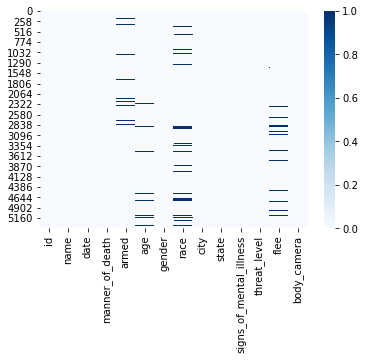

In [45]:
sns.heatmap(df.isnull(),cmap='Blues')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [47]:
df.describe()

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


In [50]:
missing_p=df.isnull().sum()/len(df)

In [51]:
missing_p[missing_p>0].sort_values(ascending=False)

race      0.096196
flee      0.045975
age       0.043390
armed     0.041913
gender    0.000369
dtype: float64

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(5416, 14)

In [54]:
df.dropna(inplace=True)

In [55]:
df.shape

(4399, 14)

In [83]:
temp=df['age'].value_counts().reset_index().sort_values('age',ascending=False)
temp.columns=['age','counts']
temp.head(10)

,age,counts
0,25.0,160
1,31.0,158
2,27.0,152
3,33.0,149
4,29.0,149
5,34.0,148
6,32.0,144
7,28.0,137
9,35.0,135
8,30.0,135


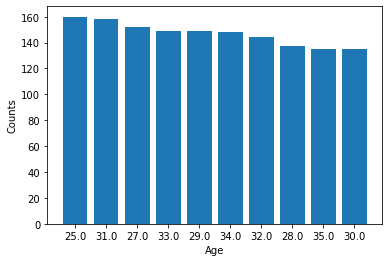

In [94]:
pl.bar(range(10),temp['counts'].head(10))
pl.xticks(range(10),temp['age'].head(10))
pl.xlabel("Age")
pl.ylabel("Counts")
pl.show()

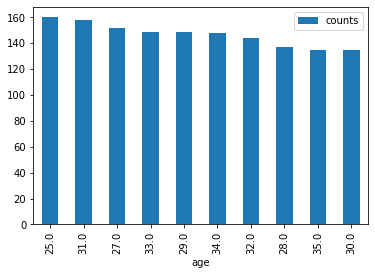

In [104]:
temp.head(10).plot(kind='bar',x='age',y='counts')

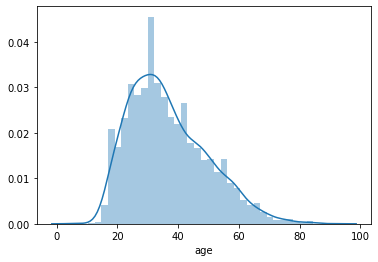

In [70]:
sns.distplot(df['age'],kde=True)

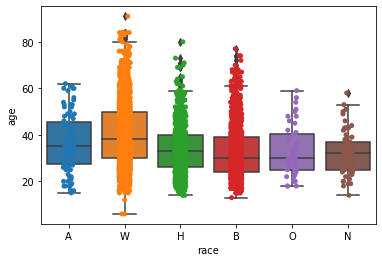

In [108]:
sns.boxplot(x='race',y='age',data=df)
sns.stripplot(x='race',y='age',data=df)

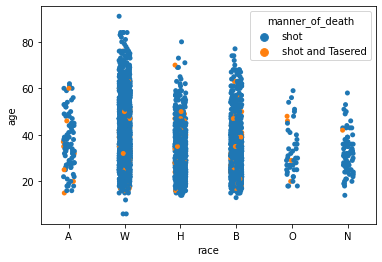

In [109]:
sns.stripplot(x='race',y='age',data=df,hue='manner_of_death')

In [112]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,B,Atlanta,GA,False,attack,Foot,True
5409,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,False
5410,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,False
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False


In [120]:
temp=df['armed'].value_counts().sort_values(ascending=False).reset_index().head(10)

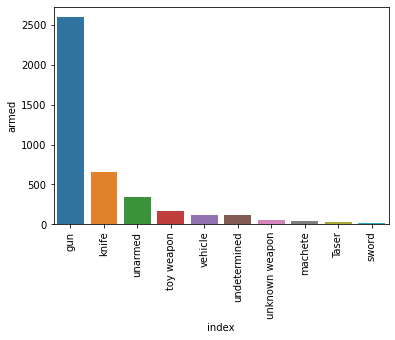

In [130]:
sns.barplot(data=temp,x='index',y='armed')
pl.xticks(rotation=90)
pl.show()

Maximum encoutner is done with the help of guns

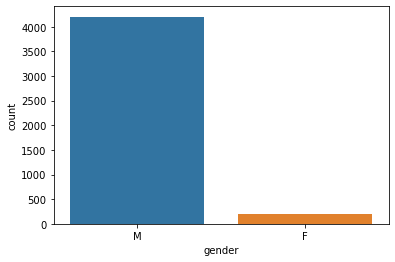

In [128]:
sns.countplot(df['gender'])

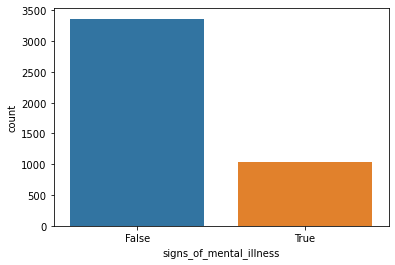

In [132]:
sns.countplot(df['signs_of_mental_illness'])

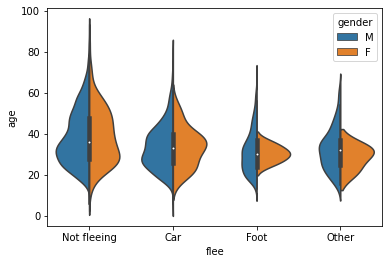

In [135]:
sns.violinplot(data=df,x='flee',y='age',hue='gender',split=True)

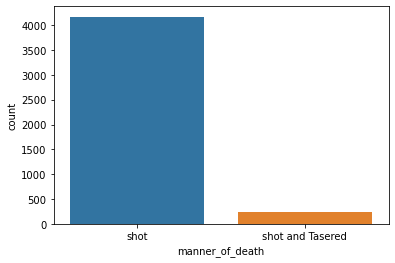

In [139]:
sns.countplot(df['manner_of_death'])

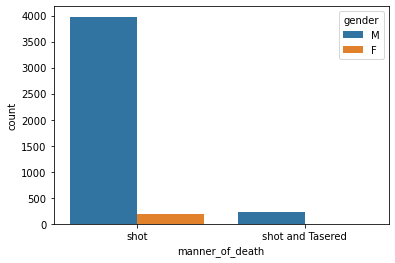

In [141]:
sns.countplot(df['manner_of_death'],hue=df['gender'])

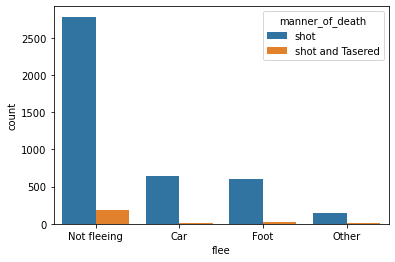

In [142]:
sns.countplot(hue=df['manner_of_death'],x=df['flee'])


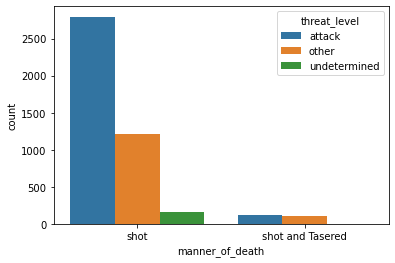

In [143]:
sns.countplot(hue=df['threat_level'],x=df['manner_of_death'])


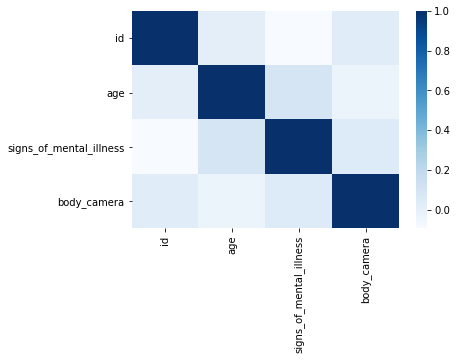

In [146]:
sns.heatmap(df.corr(),cmap='Blues')

In [149]:
temp=df['state'].value_counts().sort_values(ascending=False).reset_index().head(10)
temp.columns=['state','index']

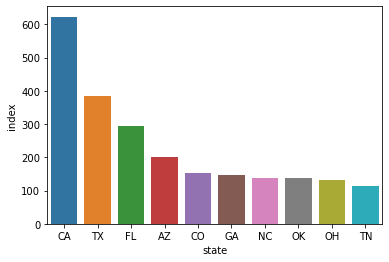

In [151]:
sns.barplot(data=temp,x='state',y='index')

In [154]:
temp=df['city'].value_counts().sort_values(ascending=False).reset_index().head(10)
temp.columns=['city','index']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

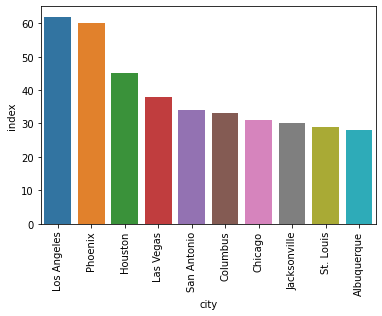

In [156]:
sns.barplot(data=temp,x='city',y='index')
pl.xticks(rotation=90)